In [1]:
from BrainPulse import features_space,plot

In [2]:
#STFT
# df = features_space.load_features_csv_concat('/Users/luki/DataspellProjects/BrainPulse_Project/Results/stft')


In [46]:
#ERP STFT
df = features_space.load_features_csv_concat('/Users/luki/DataspellProjects/BrainPulse_Project/Results/erp_stft')

In [26]:
#ERP TDEMB
df = features_space.load_features_csv_concat('/Users/luki/DataspellProjects/BrainPulse_Project/Results/erp_tdemb')

In [47]:
# import pandas as pd
# df = pd.concat([pd.read_csv('/Users/luki/DataspellProjects/BrainPulse_Project/Results/tdemb/1df_tdemb_4th_50.csv'),pd.read_csv('/Users/luki/DataspellProjects/BrainPulse_Project/Results/tdemb/2df_tdemb_4th_100.csv')]).reset_index(drop=True)

In [48]:
df

,Unnamed: 0,Subject,Task,Electrode,RR,DET,L,Lmax,DIV,Lentr,DET_RR,LAM,V,Vmax,Ventr,LAM_DET,W,Wmax,Wentr,TT
0,0,S001,no_target,Cz,0.299999,0.999894,92.796053,614,0.001629,5.085612,3.332994,0.999982,89.412924,199,4.877957,1.000089,174.755776,509,5.410926,90.273804
1,1,S001,no_target,CPz,0.299999,0.999876,85.483333,614,0.001629,4.963452,3.332934,0.999965,92.774325,184,4.944871,1.000089,179.249154,424,5.464376,93.475143
2,2,S001,no_target,POz,0.299999,0.999965,78.914685,614,0.001629,4.772231,3.333230,0.999982,97.814655,238,5.099824,1.000018,173.600656,536,5.569363,98.648018
3,3,S001,no_target,Pz,0.299999,0.999858,77.497253,614,0.001629,4.924296,3.332875,0.999991,81.806777,179,4.953559,1.000133,166.407920,310,5.525673,82.748558
4,4,S001,no_target,P1,0.299999,0.999858,70.522500,614,0.001629,4.839807,3.332875,0.999982,88.299611,204,5.044313,1.000124,174.871863,507,5.548433,89.163948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,S009,target,T8,0.299999,0.999947,90.421474,614,0.001629,4.747175,3.333171,1.000000,114.037186,285,5.103148,1.000053,182.588966,561,5.470378,115.037186
284,284,S009,target,P3,0.299999,0.999911,65.001152,614,0.001629,4.746660,3.333053,1.000000,84.049630,204,5.016878,1.000089,155.829311,351,5.483582,85.049629
285,285,S009,target,P4,0.299999,0.999929,103.336996,614,0.001629,5.115202,3.333112,1.000000,115.546843,184,4.704210,1.000071,210.961753,554,5.497730,116.546844
286,286,S009,target,F3,0.299999,0.999947,84.087928,614,0.001629,4.881073,3.333171,1.000000,102.871260,242,4.999402,1.000053,178.047075,566,5.514664,103.871262


In [49]:
#TDEMB
# df = features_space.load_features_csv_concat('/Users/luki/DataspellProjects/BrainPulse_Project/Results/tdemb')


In [50]:
# df

In [51]:
df_e_wise, y = features_space.electrode_wise_dataframe(df,condition_list=['no_target','target']) #['open_eyes','closed_eyes']


In [52]:
df_norm = features_space.select_features_clean_and_normalize(df_e_wise,features=['Lentr', 'TT', 'L', 'LAM', 'DET'])


Optimal number of features : 25


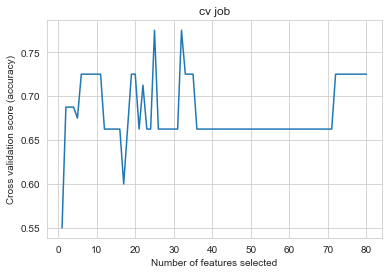

In [53]:
df_cv = features_space.cross_validation(df_norm,y,cv=4)

In [76]:
features_space.clasyfication_SVM(df_norm,y,cv=4)

Mean performance: 72.500
Mean performance open: 66.667
Mean performance closed: 79.167


(SVC(kernel='linear'), array([0, 1, 0, 0]))

In [55]:
lin, lin_pred = features_space.compute_binary_SVM(df_cv,y,predict_on_all_data = True)

SVM prediction on all data
Accuracy (Linear Kernel):  94.44
Accuracy (open):  88.89
Accuracy (close):  100.00


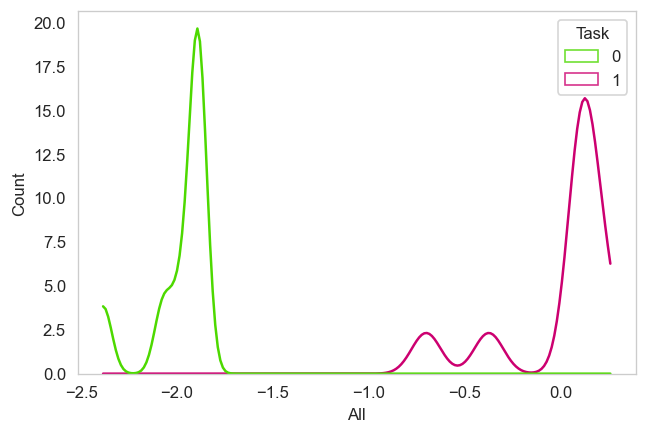

In [56]:
plot.SVM_histogram(df_cv, lin, lin_pred,'')


/Users/luki/opt/anaconda3/envs/neurodynamics/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (18). n_quantiles is set to n_samples.
  warnings.warn(
/Users/luki/opt/anaconda3/envs/neurodynamics/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


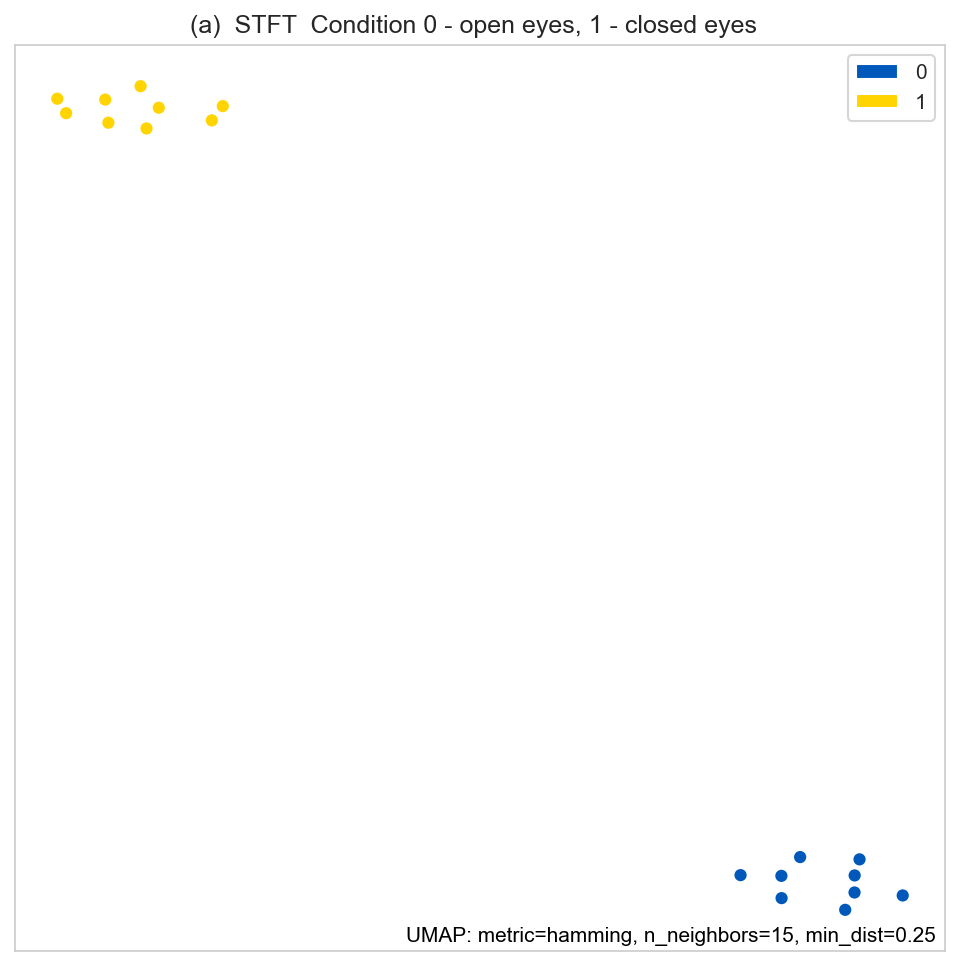

In [57]:
plot.umap_on_condition(df_cv,y,'(a)  STFT ')

/Users/luki/opt/anaconda3/envs/neurodynamics/lib/python3.8/site-packages/sklearn/preprocessing/_data.py:2583: UserWarning: n_quantiles (1000) is greater than the total number of samples (18). n_quantiles is set to n_samples.
  warnings.warn(
/Users/luki/opt/anaconda3/envs/neurodynamics/lib/python3.8/site-packages/umap/umap_.py:1802: UserWarning: gradient function is not yet implemented for hamming distance metric; inverse_transform will be unavailable
  warn(


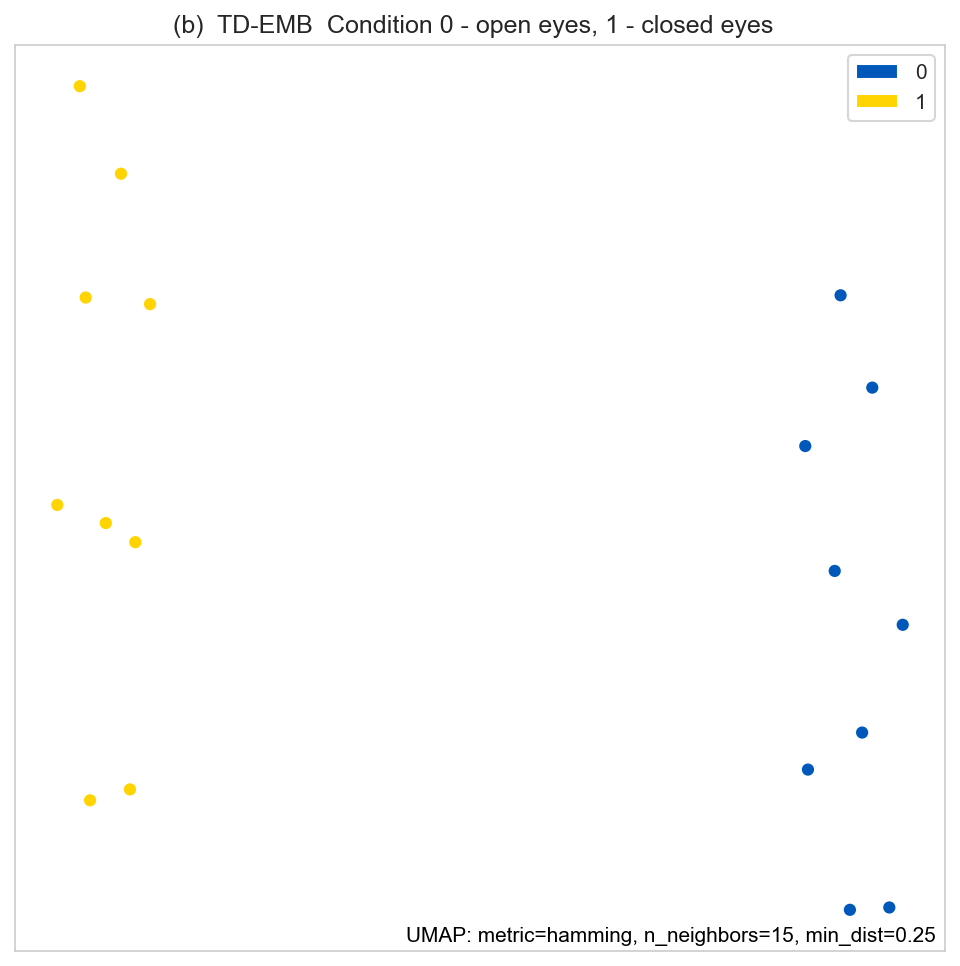

In [58]:
plot.umap_on_condition(df_e_wise,y,'(b)  TD-EMB ',df_type=False)

In [59]:
dff=df[['TT',  'DET', 'LAM', 'L', 'Lentr']]

features=['TT',  'DET', 'LAM', 'L', 'Lentr']


In [60]:
df

,Unnamed: 0,Subject,Task,Electrode,RR,DET,L,Lmax,DIV,Lentr,DET_RR,LAM,V,Vmax,Ventr,LAM_DET,W,Wmax,Wentr,TT
0,0,S001,no_target,Cz,0.299999,0.999894,92.796053,614,0.001629,5.085612,3.332994,0.999982,89.412924,199,4.877957,1.000089,174.755776,509,5.410926,90.273804
1,1,S001,no_target,CPz,0.299999,0.999876,85.483333,614,0.001629,4.963452,3.332934,0.999965,92.774325,184,4.944871,1.000089,179.249154,424,5.464376,93.475143
2,2,S001,no_target,POz,0.299999,0.999965,78.914685,614,0.001629,4.772231,3.333230,0.999982,97.814655,238,5.099824,1.000018,173.600656,536,5.569363,98.648018
3,3,S001,no_target,Pz,0.299999,0.999858,77.497253,614,0.001629,4.924296,3.332875,0.999991,81.806777,179,4.953559,1.000133,166.407920,310,5.525673,82.748558
4,4,S001,no_target,P1,0.299999,0.999858,70.522500,614,0.001629,4.839807,3.332875,0.999982,88.299611,204,5.044313,1.000124,174.871863,507,5.548433,89.163948
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,S009,target,T8,0.299999,0.999947,90.421474,614,0.001629,4.747175,3.333171,1.000000,114.037186,285,5.103148,1.000053,182.588966,561,5.470378,115.037186
284,284,S009,target,P3,0.299999,0.999911,65.001152,614,0.001629,4.746660,3.333053,1.000000,84.049630,204,5.016878,1.000089,155.829311,351,5.483582,85.049629
285,285,S009,target,P4,0.299999,0.999929,103.336996,614,0.001629,5.115202,3.333112,1.000000,115.546843,184,4.704210,1.000071,210.961753,554,5.497730,116.546844
286,286,S009,target,F3,0.299999,0.999947,84.087928,614,0.001629,4.881073,3.333171,1.000000,102.871260,242,4.999402,1.000053,178.047075,566,5.514664,103.871262


In [61]:
import rcr
import numpy as np
import pandas as pd
df_ = df
stats_data_cleaned=df_[['TT', 'DET', 'LAM', 'L', 'Lentr']]
stats_data_cleaned[:]=np.nan
r = rcr.RCR(rcr.SS_MEDIAN_DL)

for f in features:

    r.performBulkRejection(df_[f])
    cleaned_data_indices = r.result.indices
    stats_data_cleaned[f][cleaned_data_indices]=dff[f][cleaned_data_indices]

/var/folders/cd/6lrk2wsd51bfnz1bq8mlk4zr0000gn/T/ipykernel_24729/3819800049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_data_cleaned[:]=np.nan
/var/folders/cd/6lrk2wsd51bfnz1bq8mlk4zr0000gn/T/ipykernel_24729/3819800049.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stats_data_cleaned[:]=np.nan
/var/folders/cd/6lrk2wsd51bfnz1bq8mlk4zr0000gn/T/ipykernel_24729/3819800049.py:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stab

In [62]:
df_stats_data_cleaned = pd.DataFrame(df, columns=['TT', 'RR', 'DET', 'LAM', 'L', 'Lentr'])
df[['TT', 'RR', 'DET', 'LAM', 'L', 'Lentr']] = df_stats_data_cleaned

cols_to_norm = ['TT', 'RR', 'DET', 'LAM', 'L', 'Lentr']
df[cols_to_norm] = df[cols_to_norm].apply(lambda x: (x - x.min()) / (x.max() - x.min()), axis=0)

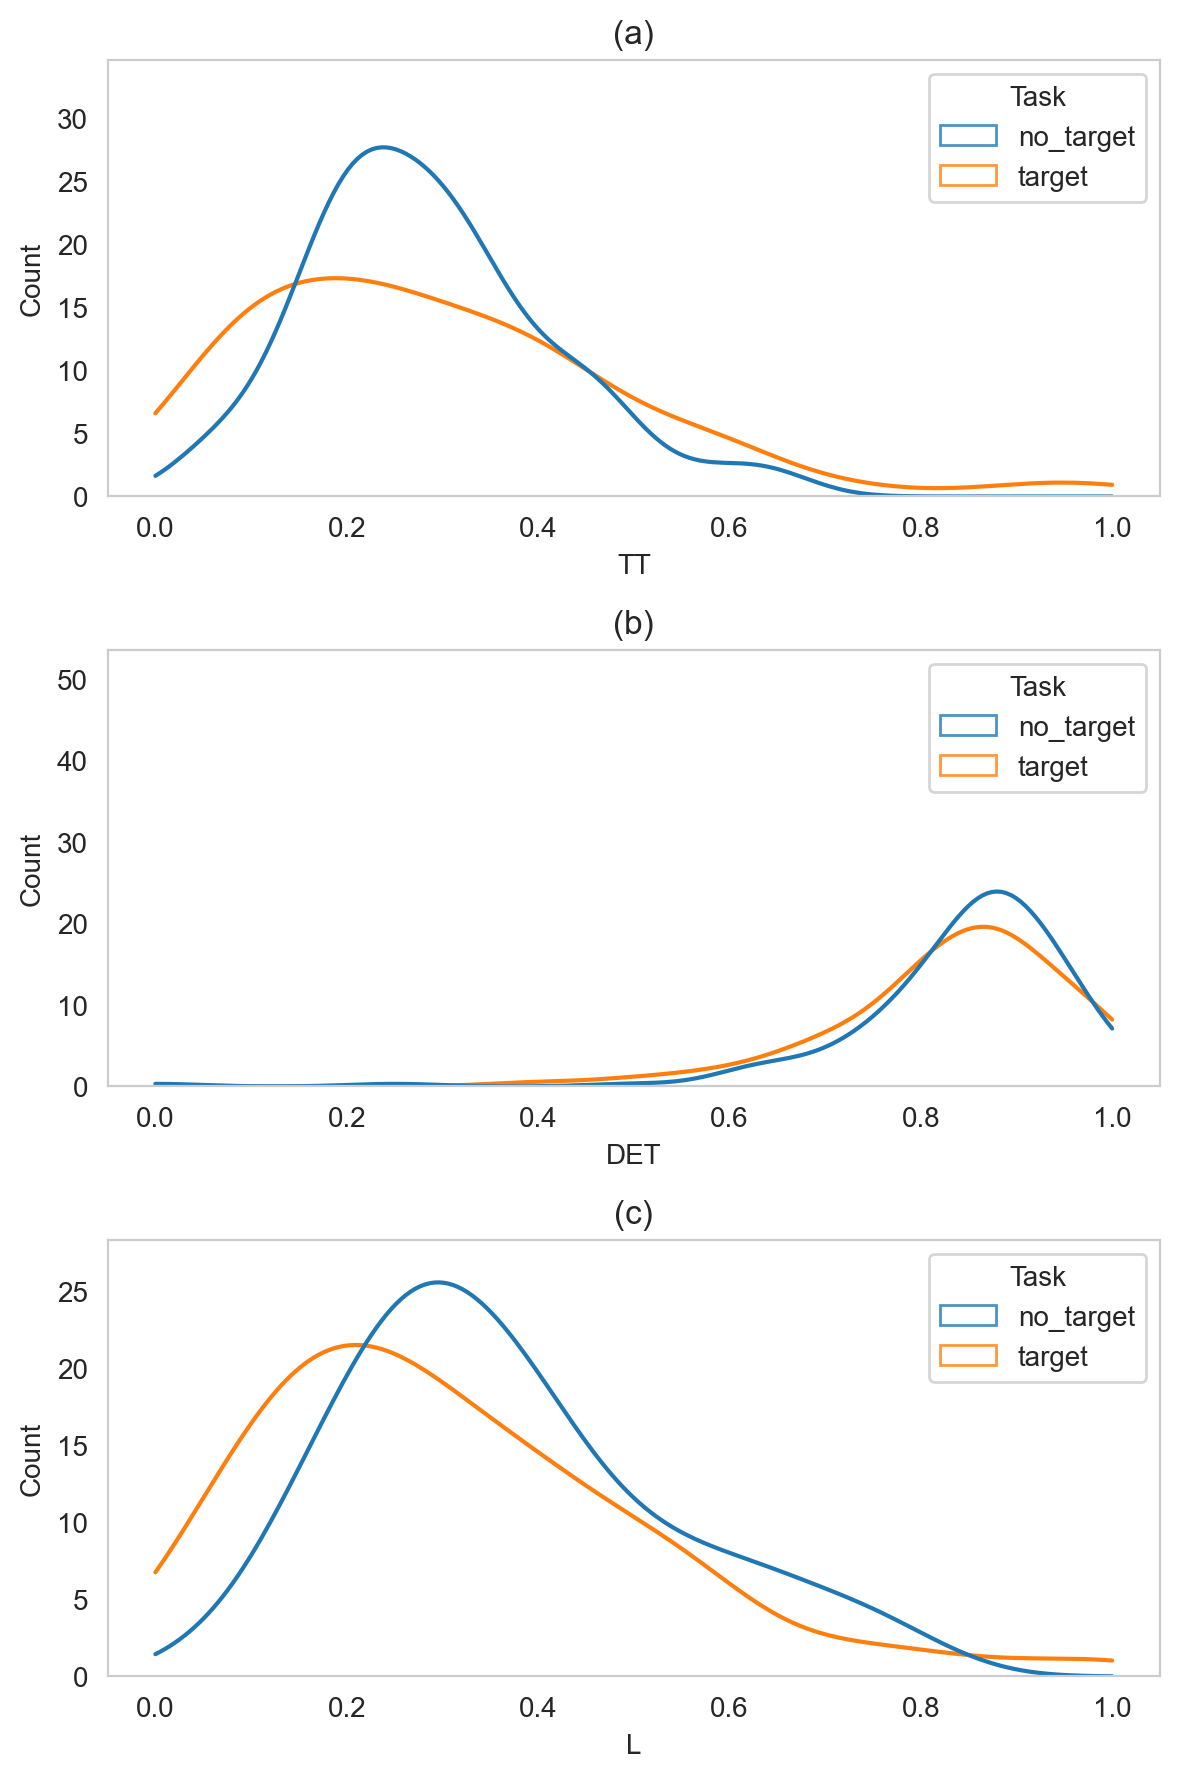

In [63]:
plot.features_hists(df=df,features_list= ['TT', 'DET', 'L'], condition='Task')

In [64]:
df

,Unnamed: 0,Subject,Task,Electrode,RR,DET,L,Lmax,DIV,Lentr,DET_RR,LAM,V,Vmax,Ventr,LAM_DET,W,Wmax,Wentr,TT
0,0,S001,no_target,Cz,1.0,0.7500,0.614816,614,0.001629,0.859693,3.332994,0.857143,89.412924,199,4.877957,1.000089,174.755776,509,5.410926,0.292456
1,1,S001,no_target,CPz,1.0,0.6875,0.518785,614,0.001629,0.759567,3.332934,0.714286,92.774325,184,4.944871,1.000089,179.249154,424,5.464376,0.328044
2,2,S001,no_target,POz,1.0,1.0000,0.432525,614,0.001629,0.602838,3.333230,0.857143,97.814655,238,5.099824,1.000018,173.600656,536,5.569363,0.385550
3,3,S001,no_target,Pz,1.0,0.6250,0.413912,614,0.001629,0.727474,3.332875,0.928571,81.806777,179,4.953559,1.000133,166.407920,310,5.525673,0.208799
4,4,S001,no_target,P1,1.0,0.6250,0.322319,614,0.001629,0.658225,3.332875,0.857143,88.299611,204,5.044313,1.000124,174.871863,507,5.548433,0.280118
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
283,283,S009,target,T8,1.0,0.9375,0.583633,614,0.001629,0.582301,3.333171,1.000000,114.037186,285,5.103148,1.000053,182.588966,561,5.470378,0.567744
284,284,S009,target,P3,1.0,0.8125,0.249813,614,0.001629,0.581879,3.333053,1.000000,84.049630,204,5.016878,1.000089,155.829311,351,5.483582,0.234380
285,285,S009,target,P4,1.0,0.8750,0.753240,614,0.001629,0.883946,3.333112,1.000000,115.546843,184,4.704210,1.000071,210.961753,554,5.497730,0.584527
286,286,S009,target,F3,1.0,0.9375,0.500461,614,0.001629,0.692047,3.333171,1.000000,102.871260,242,4.999402,1.000053,178.047075,566,5.514664,0.443615


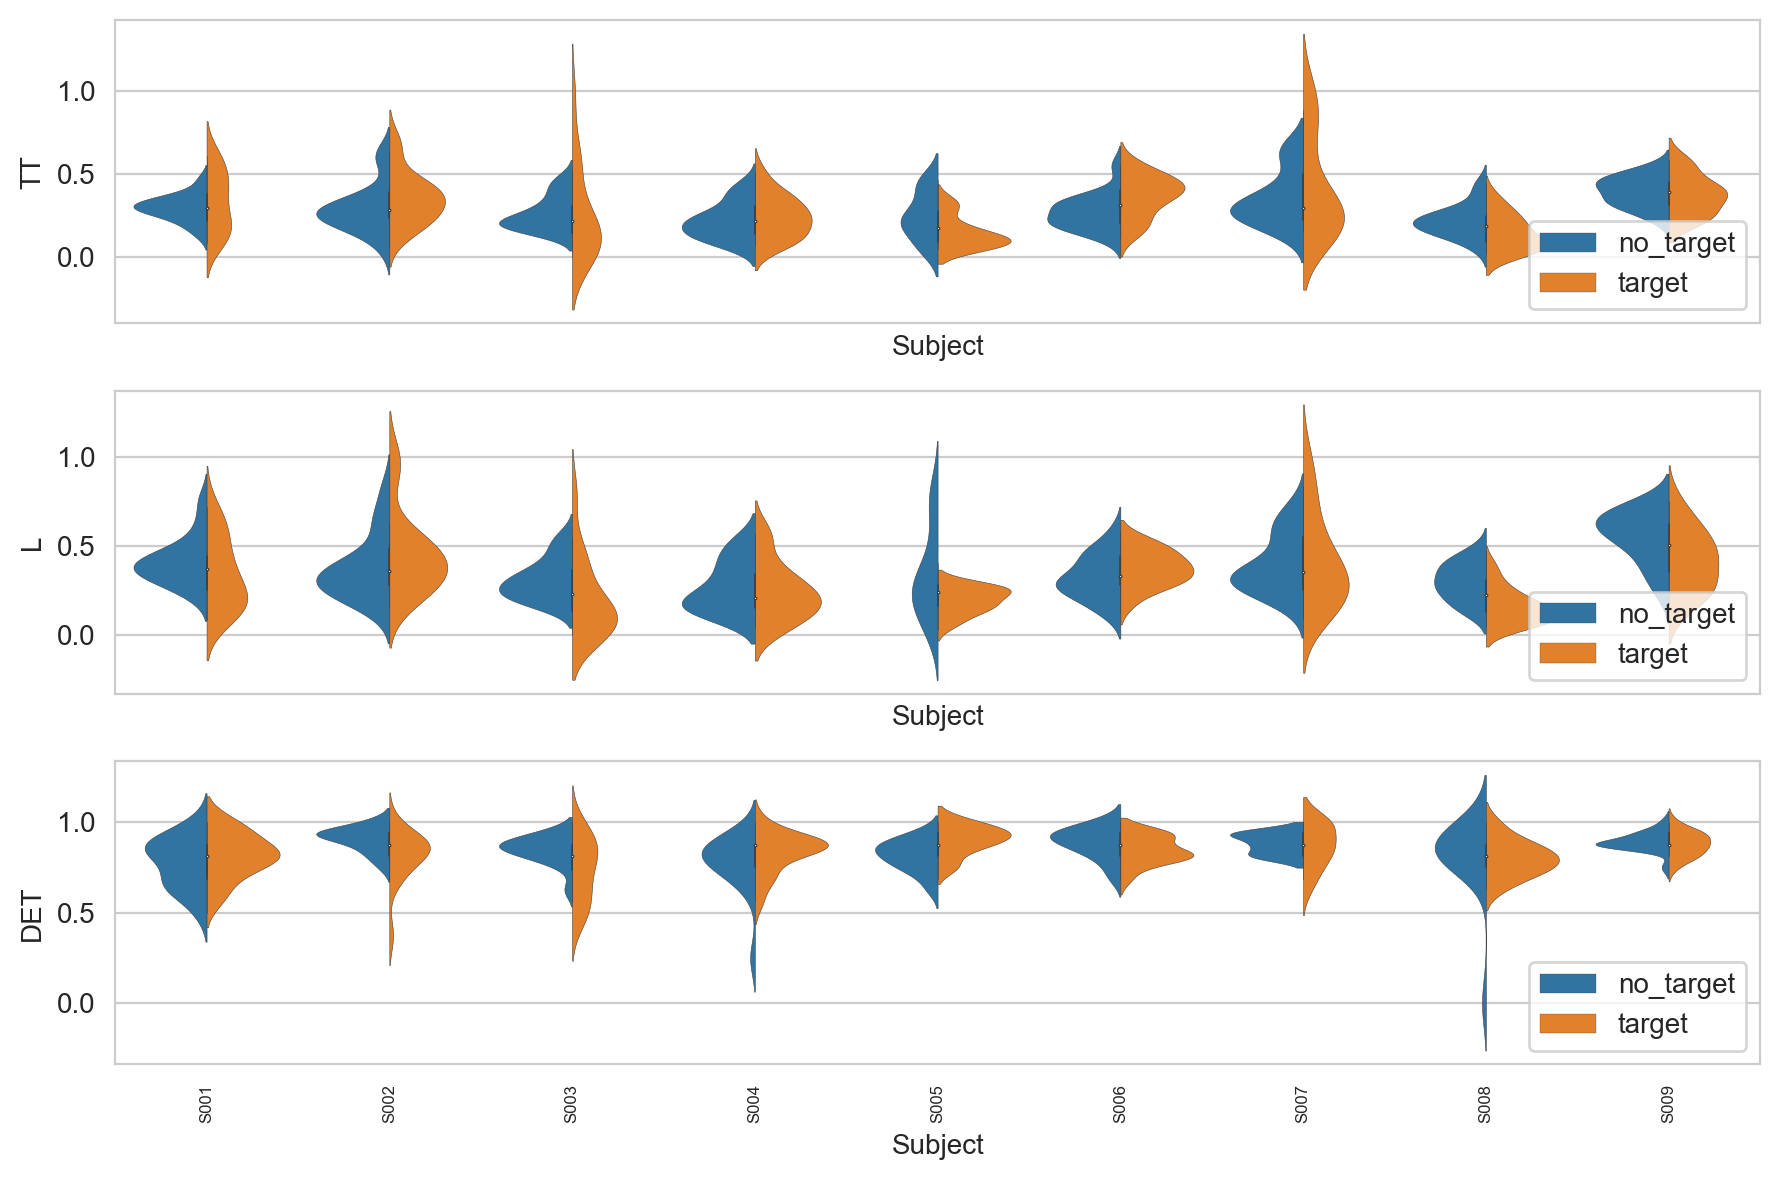

In [65]:
plot.features_per_subjects_violin(df=df,features_list=['TT','L','DET'], condition='Task')